In [3]:
'''
Select a dataset:

max_length: max video length in seconds – use 'inf' for the videos initial length
selector: selects one of the full-length datasets 
dataset: name format of the folder is dataset_compression_videos

'''

max_length = 'inf'
selector = 1
dataset = [ 'faceshifter_c23_100',    # 0
            'faceshifter_raw_100',    # 1
            'faceshifter_raw_200',    # 2
            
            'neuraltextures_c23_100', # 3
            'neuraltextures_raw_100', # 4
           ]

'''
Folders and options
'''
# video statistics (e.g. FPS per video)
path_video_stats_manipulated = '2_rPPG/'+dataset[selector]+'/stats/video_statistics_manipulated.csv'
path_video_stats_original = '2_rPPG/'+dataset[selector]+'/stats/video_statistics_original.csv'

# GRGB folders
path_GRGB_manipulated = '2_rPPG/'+dataset[selector]+'/manipulated'
path_GRGB_original = '2_rPPG/'+dataset[selector]+'/original'

# lowcut = 0.65  # Low cut-off frequency (Hz) = 39 BPM [1]
# highcut = 4.0  # High cut-off frequency (Hz) = 240 BPM [1]

'''
Implemented features:
- katz:     Katz Fractal Dimension [2]
- svd:      SVD Entropy [3]
- higuchi:  Higuchi Fractal Dimension [3]
- petros:   Petrosian Fractal Dimension [3]
- zero:     Zero-Crossings (after signal normalization) [3]

- dfa:      Detrended Fluctuation Analysis
- bpm:      BPM (using peak detection)

References:
[1] Haugg, F., Elgendi, M., & Menon, C. (2023). GRGB rPPG: An Efficient Low-Complexity Remote Photoplethysmography-Based Algorithm for Heart Rate Estimation. Bioengineering (Basel, Switzerland), 10(2), 243. https://doi.org/10.3390/bioengineering10020243
[2] Boccignone G, Conte D, Cuculo V, D’Amelio A, Grossi G, Lanzarotti R, Mortara E. (2022). pyVHR: a Python framework for remote photoplethysmography. PeerJ Computer Science 8:e929 https://doi.org/10.7717/peerj-cs.929
[3] Boccignone, G., Bursic, S., Cuculo, V., D’Amelio, A., Grossi, G., Lanzarotti, R., & Patania, S. (2022). Deepfakes have no heart: A simple rppg-based method to reveal fake videos. In International Conference on Image Analysis and Processing (pp. 186-195). Springer International Publishing. https://doi.org/10.1007/978-3-031-06430-2_16

'''


'\nImplemented features:\n- katz:     Katz Fractal Dimension [2]\n- svd:      SVD Entropy [3]\n- higuchi:  Higuchi Fractal Dimension [3]\n- petros:   Petrosian Fractal Dimension [3]\n- zero:     Zero-Crossings (after signal normalization) [3]\n\n- dfa:      Detrended Fluctuation Analysis\n- bpm:      BPM (using peak detection)\n\nReferences:\n[1] Haugg, F., Elgendi, M., & Menon, C. (2023). GRGB rPPG: An Efficient Low-Complexity Remote Photoplethysmography-Based Algorithm for Heart Rate Estimation. Bioengineering (Basel, Switzerland), 10(2), 243. https://doi.org/10.3390/bioengineering10020243\n[2] Boccignone G, Conte D, Cuculo V, D’Amelio A, Grossi G, Lanzarotti R, Mortara E. (2022). pyVHR: a Python framework for remote photoplethysmography. PeerJ Computer Science 8:e929 https://doi.org/10.7717/peerj-cs.929\n[3] Boccignone, G., Bursic, S., Cuculo, V., D’Amelio, A., Grossi, G., Lanzarotti, R., & Patania, S. (2022). Deepfakes have no heart: A simple rppg-based method to reveal fake videos

In [4]:
''' Various functions '''

import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy.signal import butter, filtfilt
import antropy as ant

# load data
stats_original = pd.read_csv(path_video_stats_original)
stats_manipulated = pd.read_csv(path_video_stats_manipulated)

def get_fps(filename, df):
    filename = filename.strip()
    if filename in df['Filename'].values:
        fps_value = df.loc[df['Filename'] == filename, 'FPS'].values[0]
        return fps_value
    else:
        return None
    
def get_fps2(filename, df):
    filename = int(filename.strip()) # INT
    if filename in df['Filename'].values:
        fps_value = df.loc[df['Filename'] == filename, 'FPS'].values[0]
        return fps_value
    else:
        return None
    
def get_csvs(root_folder):
    csv_list = []
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.endswith(('.csv')):
                file_path = os.path.join(root, file)
                csv_list.append(file_path)
    return csv_list

def extract_filename(file_path):
    match = re.search(r'([^/]+)\.csv$', file_path) # filename pattern (e.g., "002_006")
    if match:
        return match.group(1)
    else:
        return None
    
''' 
FILTER 
'''
def bandpass_filter(data, lowcut, highcut, fs, order=6):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band') 
    y = filtfilt(b, a, data)
    return y

''' 
BPM detection
'''
def get_bpm_peaks(data):
    peaks, _ = find_peaks(data, distance=fps/2)
    peak_intervals = np.diff(peaks) / fps
    heart_rate = 60.0 / np.mean(peak_intervals)
    return heart_rate

In [5]:
import os

def count_files_in_folder(folder_path):
    try:
        files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        num_files = len(files)
        print(f"There are {num_files} files in the folder '{folder_path}'.")
    except FileNotFoundError:
        print(f"The folder '{folder_path}' does not exist.")
    except Exception as e:
        print(f"An error occurred: {e}")

count_files_in_folder(path_GRGB_manipulated)
count_files_in_folder(path_GRGB_original)

There are 100 files in the folder '2_rPPG/faceshifter_raw_100/manipulated'.
There are 100 files in the folder '2_rPPG/faceshifter_raw_100/original'.


In [6]:
df_manipulated = pd.DataFrame(columns=['bpm', 'zero','katz','svd','dfa','higuchi','petros']) #,'len'
csv_list_manipulated = get_csvs(path_GRGB_manipulated)

for i in csv_list_manipulated:
    filename = extract_filename(i)
    try:
        rPPG_signal_raw = pd.read_csv(i, sep=',', header=None).transpose()
    except pd.errors.EmptyDataError:
        print(f"Excluded due to empty file: {filename}")
        continue
    
    rPPG_signal = rPPG_signal_raw.dropna()
    fps = get_fps(filename,stats_manipulated)
    
    if len(rPPG_signal) < 30:
        print(f"Excluded due to short length: {filename}")
        continue
    
    #rPPG_signal_filter = bandpass_filter(rPPG_signal[0], lowcut, highcut, fps)
    #rPPG_signal_filter = (rPPG_signal_filter - np.mean(rPPG_signal_filter)) / np.std(rPPG_signal_filter)
    rPPG_signal = rPPG_signal[0] # only the raw GRGB signal is used, according to [3]
    
    # truncate the signal if max_length has been specified
    if isinstance(max_length, int):
        rPPG_signal = rPPG_signal[:int(max_length * fps)]

    df_manipulated.loc[filename, 'bpm'] = get_bpm_peaks(rPPG_signal)
    df_manipulated.loc[filename, 'katz'] = ant.katz_fd(rPPG_signal)
    df_manipulated.loc[filename, 'svd'] = ant.svd_entropy(rPPG_signal, normalize=True)
    df_manipulated.loc[filename, 'dfa'] = ant.detrended_fluctuation(rPPG_signal)
    df_manipulated.loc[filename, 'higuchi'] = ant.higuchi_fd(rPPG_signal)
    df_manipulated.loc[filename, 'petros'] = ant.petrosian_fd(rPPG_signal)
    #df_manipulated.loc[filename, 'len'] = len(rPPG_signal)/fps

    # zero-crossings are affected by the signals normalization!
    rPPG_signal = (rPPG_signal - np.mean(rPPG_signal)) / np.std(rPPG_signal)
    df_manipulated.loc[filename, 'zero'] = ant.num_zerocross(rPPG_signal)

Excluded due to empty file: 456_435
Excluded due to short length: 221_206


In [7]:
df_original = pd.DataFrame(columns=['bpm', 'zero','katz','svd','dfa','higuchi','petros']) #,'len'
csv_list_original = get_csvs(path_GRGB_original)

for i in csv_list_original:
    filename = extract_filename(i)
    try:
        rPPG_signal_raw = pd.read_csv(i, sep=',', header=None).transpose()
    except pd.errors.EmptyDataError:
        print(f"Excluded due to empty file: {filename}")
        continue

    rPPG_signal = rPPG_signal_raw.dropna()

    fps = get_fps2(filename, stats_original)
    
    if fps is None:
        print(f"Excluded due to None FPS: {filename}")
        continue  # Skip this iteration if FPS is None
    
    if len(rPPG_signal) < 30:
        print(f"Excluded due to short length: {filename}")
        continue

    # rPPG_signal_filter = bandpass_filter(rPPG_signal[0], lowcut, highcut, fps)
    # rPPG_signal = (rPPG_signal_filter - np.mean(rPPG_signal_filter)) / np.std(rPPG_signal_filter)
    rPPG_signal = rPPG_signal[0] # only the raw GRGB signal is used, according to [3]
    
    # truncate the signal if max_length has been specified
    if isinstance(max_length, int):
        rPPG_signal = rPPG_signal[:int(max_length * fps)]

    df_original.loc[filename, 'bpm'] = get_bpm_peaks(rPPG_signal)
    df_original.loc[filename, 'katz'] = ant.katz_fd(rPPG_signal)
    df_original.loc[filename, 'svd'] = ant.svd_entropy(rPPG_signal, normalize=True)
    df_original.loc[filename, 'dfa'] = ant.detrended_fluctuation(rPPG_signal)
    df_original.loc[filename, 'higuchi'] = ant.higuchi_fd(rPPG_signal)
    df_original.loc[filename, 'petros'] = ant.petrosian_fd(rPPG_signal)
    #df_original.loc[filename, 'len'] = len(rPPG_signal)/fps
    # zero-crossings are affected by the signals normalization!
    rPPG_signal = (rPPG_signal - np.mean(rPPG_signal)) / np.std(rPPG_signal)
    df_original.loc[filename, 'zero'] = ant.num_zerocross(rPPG_signal)

Excluded due to empty file: 221
Excluded due to empty file: 456


In [8]:
''' Balance of data? '''
print(f"{len(df_manipulated)} \t manipulated")
print(f"{len(df_original)} \t original")

98 	 manipulated
98 	 original


# ——— SVM

In [9]:
df_original['label'] = 'original'
df_manipulated['label'] = 'manipulated'
df_combined = pd.concat([df_original, df_manipulated])


In [10]:
# ''' Inspect Feature Combination (Graphs) '''

# def plot(x,y, alpha):
#     plt.scatter(df_original[x],df_original[y], marker='x',label='original'+f' ({len(df_original)})', alpha=alpha)
#     plt.scatter(df_manipulated[x],df_manipulated[y], marker='x',label='manipulated'+f' ({len(df_manipulated)})', color='red', alpha=alpha)
#     plt.xlabel(x)
#     plt.ylabel(y)
#     plt.title(dataset[selector])
#     plt.legend()
#     plt.show()
# plot('katz','svd', 1)
# plot('katz','higuchi', 1)
# plot('svd','higuchi', 1)

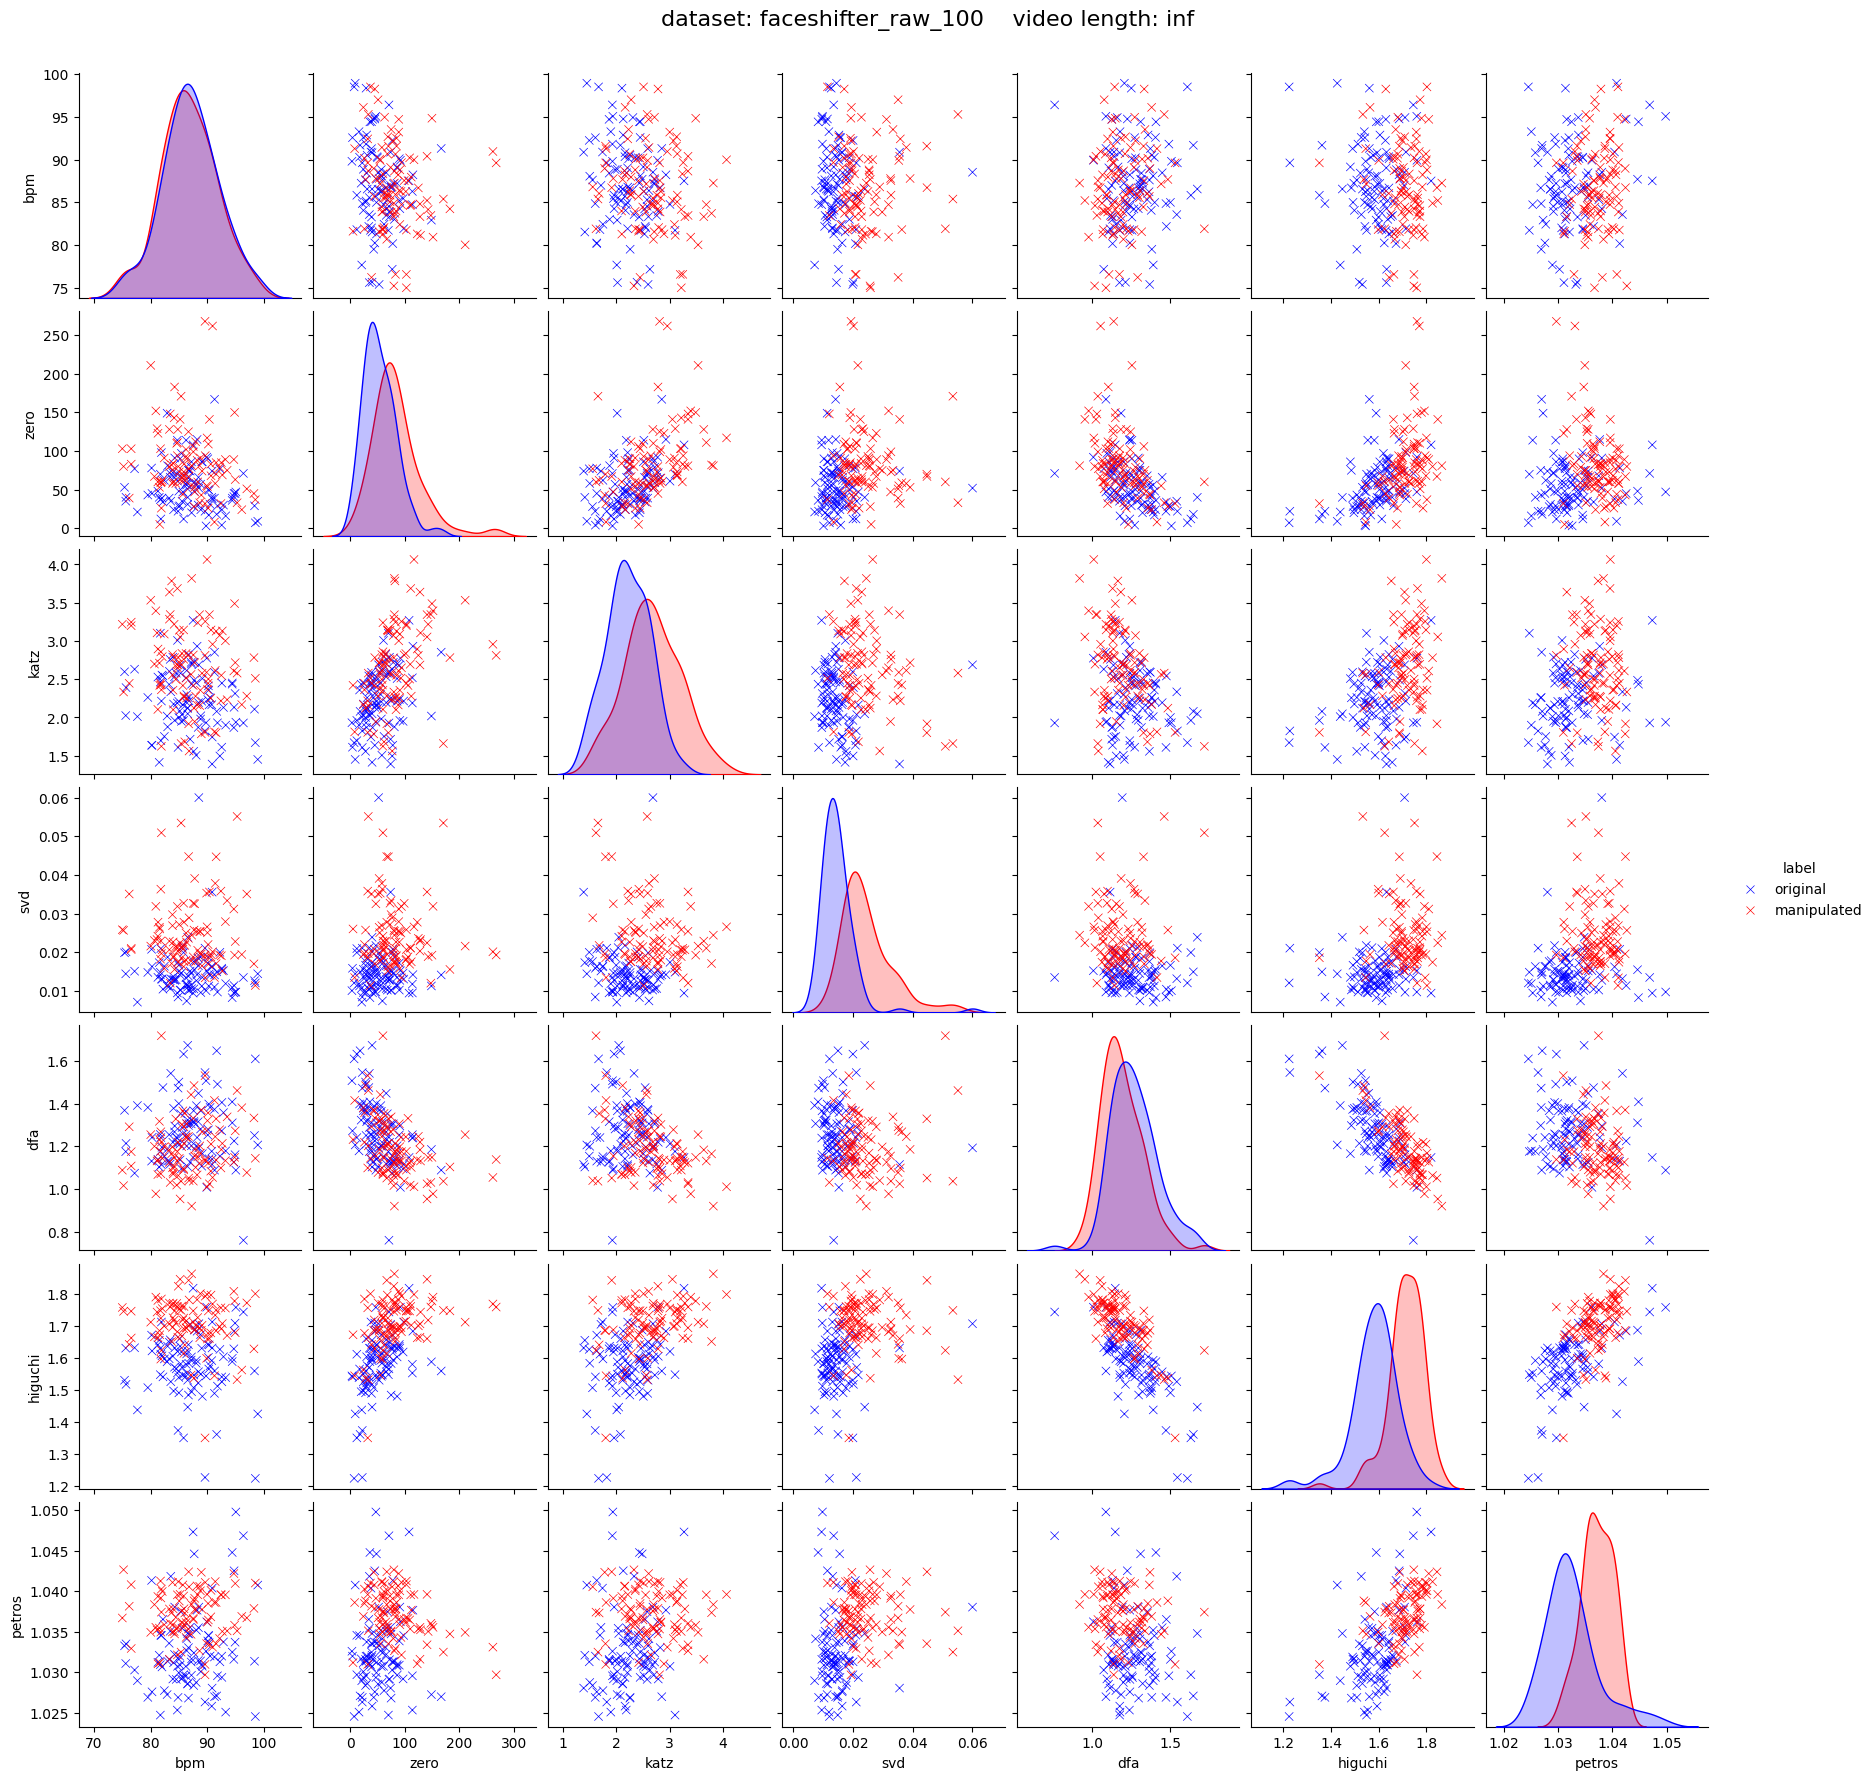

In [11]:
''' Inspect Feature Combination (Matrix) '''

import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {
    'manipulated': 'red',
    'original': 'blue'
}
custom_markers = {'manipulated': 'x', 'original': 'x'}  

g = sns.pairplot(df_combined, hue='label', palette=custom_palette, markers=custom_markers)
g.fig.suptitle(f"dataset: {dataset[selector]}    video length: {max_length}", y=1.02,fontsize=16)

plt.show()


In [12]:
''' 
INITIAL ACCURACY
Test accuracy with feature normalization and standard parameters
'''
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X = df_combined.drop('label', axis=1) # All features
y = df_combined['label']  # Target labels

scaler = StandardScaler()
X = scaler.fit_transform(X)

# split dataset into training and testing sets, ratio: 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

# evaluate model on the test set
accuracy = model.score(X_test, y_test)
print("Test accuracy with feature normalization and standard parameters")
print(f"test accuracy for {dataset[selector]}: {accuracy:.2f}")
print(f"percentage: {accuracy * 100:.2f}%".replace('.', ',') )

Test accuracy with feature normalization and standard parameters
test accuracy for faceshifter_raw_100: 0.90
percentage: 89,83%


In [13]:
''' 
CONFUSION MATRIX 
'''
from sklearn.metrics import confusion_matrix

svm_predicted = model.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted,labels=['manipulated', 'original'])
print(confusion)

[[24  5]
 [ 1 29]]


In [14]:
''' 
FEATURE SELECTION:
Measures how much each feature contributes to the model's decision boundary.
For linear SVM models – model-based coefficients

'''
feature_names = df_combined.columns.tolist()  # Convert column names to a list

# ensure model has a linear kernel (since coef_ only works for linear kernels)
if hasattr(model, 'coef_'):
    # extract feature importance (weights of the linear SVM)
    feature_importance = np.abs(model.coef_[0])

    # pair feature importance with feature names
    feature_importance_with_names = sorted(zip(feature_importance, feature_names), reverse=True)

    # sisplay sorted feature importance
    print("Feature – Importance for model:\n")
    for importance, name in feature_importance_with_names:
        print(f"{importance:.2f} \t {name}")
else:
    raise AttributeError("The model does not support feature importance extraction (only works for linear kernels).")

Feature – Importance for model:

1.57 	 higuchi
0.96 	 svd
0.70 	 dfa
0.68 	 katz
0.23 	 petros
0.06 	 bpm
0.03 	 zero


In [15]:
''' 
FEATURE SELECTION:
Measures the statistical significance of each feature's relationship with the target label.
For all model types – uses ANOVA

'''

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif
import pandas as pd

X = df_combined.drop('label', axis=1)  # All features
Y = df_combined['label']  # Target labels

# feature extraction
test = SelectKBest(score_func=f_classif, k='all')
fit = test.fit(X, Y)

fsr = pd.DataFrame({'feature': X.columns, 'score': fit.scores_})
fsr_sorted = fsr.sort_values(by='score', ascending=False)

print("Feature – General Statistical Significance:\n")
for _, row in fsr_sorted.iterrows():
    print(f"{row['score']:.2f} \t {row['feature']}")


Feature – General Statistical Significance:

109.38 	 higuchi
85.90 	 svd
62.49 	 petros
45.76 	 katz
30.24 	 zero
15.00 	 dfa
0.19 	 bpm


In [16]:
''' 
INITIAL ACCURACY – 10CV
'''

from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


X = df_combined.drop('label', axis=1) # All features
y = df_combined['label']  # Target labels

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

fold_accuracies = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # standardize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # train
    model = SVC(kernel='linear') #SVC(kernel='linear', C=0.1, gamma='scale')
    model.fit(X_train, y_train)
    
    # test
    y_pred = model.predict(X_test)
    
    # evaluate
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

# Output the accuracies for each fold
print("Initial accuracy (standard parameters, feature normalization)\n")
print(f"dataset : {dataset[selector]}")
print("accuracies for each fold:", fold_accuracies)
mean_fold_accuracy = sum(fold_accuracies) / len(fold_accuracies)
print(f"mean accuracy across folds: {mean_fold_accuracy:.2}")
print(f"percentage: {mean_fold_accuracy * 100:.2f}%".replace('.', ',') )
accuracy_initial = mean_fold_accuracy 

Initial accuracy (standard parameters, feature normalization)

dataset : faceshifter_raw_100
accuracies for each fold: [0.95, 0.95, 0.95, 1.0, 1.0, 0.85, 0.9473684210526315, 0.8947368421052632, 0.8421052631578947, 0.9473684210526315]
mean accuracy across folds: 0.93
percentage: 93,32%


In [17]:
''' 
HYPERPARAMETER OPTIMIZATION
'''

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.1, 1, 10, 100],     # regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],  # kernel coefficient
    'kernel': ['linear','rbf','sigmoid','poly'] 
}

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy'
)

print(f"dataset : {dataset[selector]}")
optimal_params.fit(X_train,y_train)
print(f"parameters : {optimal_params.best_params_}")
accuracy = model.score(X_test, y_test)
print(f"accuracy: {accuracy:.2f}")
print(f"percentage: {accuracy * 100:.2f}%".replace('.', ',') )


dataset : faceshifter_raw_100
parameters : {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
accuracy: 0.95
percentage: 94,74%


In [18]:
''' 
OPTIMIZED TRAINING
on specified hyperparameters and features
'''

X = df_combined[['higuchi', 'svd', 'petros','katz']] # Specific features
y = df_combined['label']  # Target labels

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"test accuracy for {dataset[selector]}: {accuracy:.2f}")
print(f"percentage: {accuracy * 100:.2f}%".replace('.', ',') )

test accuracy for faceshifter_raw_100: 0.92
percentage: 91,53%


In [19]:
''' 
TEST FOR OVERFITTING: 
a) high training accuracy but significantly lower test accuracy
b) cross-validation scores are much lower than the training accuracy
'''

from sklearn.metrics import accuracy_score

# predictions on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# accuracy for training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"{train_accuracy:.4f} \t train accuracy")
print(f"{test_accuracy:.4f} \t test accuracy")
print(f"{abs(test_accuracy-train_accuracy):.4f} \t abs. difference")

0.9781 	 train accuracy
0.9153 	 test accuracy
0.0628 	 abs. difference


In [20]:
''' 
CONFUSION MATRIX 
'''

svm_predicted = model.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted,labels=['manipulated', 'original'])
print(confusion)

[[25  4]
 [ 1 29]]


In [21]:
''' 
EVALUATION METRICS
- Precision: Measures how many instances predicted as "original" are actually "original."
- Recall: Measures how many of the actual "original" instances are correctly identified.
- F1 Score: Indicates balance between precision and recall

'''

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Function to evaluate the model and interpret the results
def evaluate_model(y_test, svm_predicted, labels=['manipulated', 'original']):
    confusion = confusion_matrix(y_test, svm_predicted, labels=labels)    
    # Precision, Recall, F1-Score
    precision = precision_score(y_test, svm_predicted, pos_label='original')
    recall = recall_score(y_test, svm_predicted, pos_label='original')
    f1 = f1_score(y_test, svm_predicted, pos_label='original')
    
    print("\nEvaluation Metrics:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
svm_predicted = model.predict(X_test)
evaluate_model(y_test, svm_predicted, labels=['manipulated', 'original'])



Evaluation Metrics:
Precision: 0.88
Recall: 0.97
F1 Score: 0.92


In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

fold_accuracies = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = SVC(kernel='rbf', C=1, gamma='scale') #SVC(kernel='linear', C=0.1, gamma='scale')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

print("Optimized accuracy \n")
print(f"dataset : {dataset[selector]}")
print("accuracies for each fold:", fold_accuracies)
mean_fold_accuracy = sum(fold_accuracies) / len(fold_accuracies)
print(f"mean accuracy across folds: {mean_fold_accuracy:.2}")
print(f"percentage: {mean_fold_accuracy * 100:.2f}%".replace('.', ',') )
accuracy_optimized = mean_fold_accuracy 


Optimized accuracy 

dataset : faceshifter_raw_100
accuracies for each fold: [0.95, 0.95, 1.0, 1.0, 1.0, 0.8, 0.9473684210526315, 0.9473684210526315, 0.8421052631578947, 1.0]
mean accuracy across folds: 0.94
percentage: 94,37%


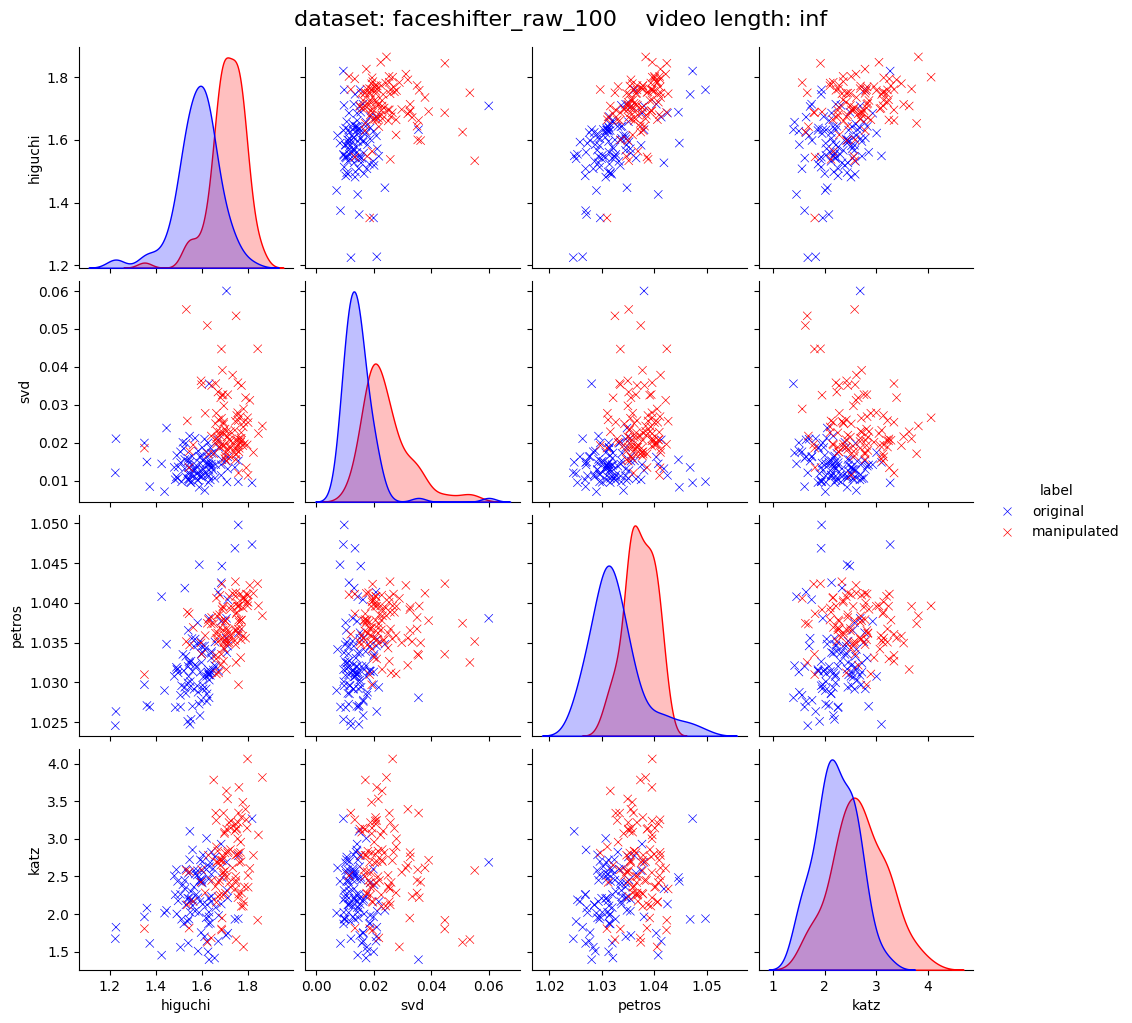

In [23]:
''' 
OPTIMIZED FEATURES: MATRIX
'''

features_to_include = ['higuchi', 'svd', 'petros', 'katz']

df_subset = df_combined[features_to_include + ['label']]

# Custom palette and markers for the labels
custom_palette = {
    'manipulated': 'red',
    'original': 'blue'
}
custom_markers = {'manipulated': 'x', 'original': 'x'}  

g = sns.pairplot(df_subset, hue='label', palette=custom_palette, markers=custom_markers)

g.fig.suptitle(f"dataset: {dataset[selector]}    video length: {max_length}", y=1.02, fontsize=16)
plt.show()


In [24]:
''' 
RESULTS
'''
print(f"dataset : {dataset[selector]}")
print(f"length : {max_length} \n")
print(f"initial accuracy: \t {accuracy_initial* 100:.2f}".replace('.', ','))
print(f"optimized accuracy: \t {accuracy_optimized* 100:.2f}".replace('.', ','))

dataset : faceshifter_raw_100
length : inf 

initial accuracy: 	 93,32
optimized accuracy: 	 94,37
